## VADER more sentiment analysis 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer


# easier to see full text with a bigger maxwidth:
pd.options.display.max_colwidth = 200

In [2]:
df = pd.read_csv('../data/parenting_combine_50.csv')
df.dropna(inplace = True)
df.head()

,subreddit,id,selftext,title,num_comments,created_utc,parent_id,link_id,author,body,all_text
0,Parenting,u35fhw,We recently found a drop in daycare for my 3yr old and we thought he was doing great. I explained to the teachers that he had never been to daycare before and we weren’t sure how he would do. They...,Daycare recommends shorter drop offs.,0.0,1649898505,fromsubmission,fromsubmission,fromsubmission,fromsubmission,We recently found a drop in daycare for my 3yr old and we thought he was doing great. I explained to the teachers that he had never been to daycare before and we weren’t sure how he would do. They...
1,Parenting,u355wz,"So I've lurked on this sub for a long time as myself and my partner were on the fence about having kids. We're now pretty decided that we do want to be parents someday, but there's obviously a lot...",Looking for advice for taking the leap to becoming a parent,0.0,1649897684,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"So I've lurked on this sub for a long time as myself and my partner were on the fence about having kids. We're now pretty decided that we do want to be parents someday, but there's obviously a lot..."
2,Parenting,u34x24,So my 20yr old son came back to live with me and my partner year. He hasn't had to worry about anything. I cook I clean I do his washing (my fault I know) he works but when he's not at work all he...,lazy teenager,0.0,1649896924,fromsubmission,fromsubmission,fromsubmission,fromsubmission,So my 20yr old son came back to live with me and my partner year. He hasn't had to worry about anything. I cook I clean I do his washing (my fault I know) he works but when he's not at work all he...
3,Parenting,u34vh5,"I feel bad about posting, since I had all the support in the world and everything went according to plan.\n\nI had a planned pregnancy during covid lockdown, and despite a couple of health issues,...",I still haven't bonded with my 1 year old,0.0,1649896790,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"I feel bad about posting, since I had all the support in the world and everything went according to plan.\n\nI had a planned pregnancy during covid lockdown, and despite a couple of health issues,..."
4,Parenting,u34sai,"My Steam library is looking a bit thin when it comes to kid-friendly games.\n\nGames like Spyro, Yooka-Laylee, Crash Bandicoot, Toybox Turbos, Sonic Generations, Human Fall Flat, Goat Simulator an...",PC game advice for a 5 year old.,0.0,1649896511,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"My Steam library is looking a bit thin when it comes to kid-friendly games.\n\nGames like Spyro, Yooka-Laylee, Crash Bandicoot, Toybox Turbos, Sonic Generations, Human Fall Flat, Goat Simulator an..."


In [4]:
df.isnull().sum()

subreddit       0
id              0
selftext        0
title           0
num_comments    0
created_utc     0
parent_id       0
link_id         0
author          0
body            0
all_text        0
dtype: int64

In [5]:
df.shape

(10000, 11)

In [6]:
df_vader = df[['all_text']]

In [7]:
df_vader.head()

,all_text
0,We recently found a drop in daycare for my 3yr old and we thought he was doing great. I explained to the teachers that he had never been to daycare before and we weren’t sure how he would do. They...
1,"So I've lurked on this sub for a long time as myself and my partner were on the fence about having kids. We're now pretty decided that we do want to be parents someday, but there's obviously a lot..."
2,So my 20yr old son came back to live with me and my partner year. He hasn't had to worry about anything. I cook I clean I do his washing (my fault I know) he works but when he's not at work all he...
3,"I feel bad about posting, since I had all the support in the world and everything went according to plan.\n\nI had a planned pregnancy during covid lockdown, and despite a couple of health issues,..."
4,"My Steam library is looking a bit thin when it comes to kid-friendly games.\n\nGames like Spyro, Yooka-Laylee, Crash Bandicoot, Toybox Turbos, Sonic Generations, Human Fall Flat, Goat Simulator an..."


Remove URLs

In [8]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [9]:
df_vader['all_text'].apply(lambda text: remove_urls(text))
df_vader.head(2)

,all_text
0,We recently found a drop in daycare for my 3yr old and we thought he was doing great. I explained to the teachers that he had never been to daycare before and we weren’t sure how he would do. They...
1,"So I've lurked on this sub for a long time as myself and my partner were on the fence about having kids. We're now pretty decided that we do want to be parents someday, but there's obviously a lot..."


Lowercase

In [10]:
import nltk
from nltk.corpus import stopwords

In [11]:
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
df_vader['all_text'] = df_vader['all_text'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15440/2955977913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))


In [13]:
df_vader.head()

,all_text
0,"recently found drop daycare 3yr old thought great. explained teachers never daycare weren’t sure would do. told experience kids like would take time would okay. couple weeks, teachers said better,..."
1,"i've lurked sub long time partner fence kids. we're pretty decided want parents someday, there's obviously lot worried about! i'm thinker, i'm afraid i'll think death never take plunge. want ask p..."
2,20yr old son came back live partner year. worry anything. cook clean washing (my fault know) works he's work sleep. sleeps day goes work comes home stays till early hrs constantly repeating itself...
3,"feel bad posting, since support world everything went according plan. planned pregnancy covid lockdown, despite couple health issues, severe gender dissapointment, everything went normally. took, ..."
4,"steam library looking bit thin comes kid-friendly games. games like spyro, yooka-laylee, crash bandicoot, toybox turbos, sonic generations, human fall flat, goat simulator especially donut county ..."


In [14]:
def remove_nums(text):
    text_nonum = re.sub(r'\d+', '', text)
    return text_nonum

In [15]:
df_vader['all_text'] = df_vader['all_text'].apply(lambda text: remove_nums(text))
df_vader.head()

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15440/1255113691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].apply(lambda text: remove_nums(text))


,all_text
0,"recently found drop daycare yr old thought great. explained teachers never daycare weren’t sure would do. told experience kids like would take time would okay. couple weeks, teachers said better, ..."
1,"i've lurked sub long time partner fence kids. we're pretty decided want parents someday, there's obviously lot worried about! i'm thinker, i'm afraid i'll think death never take plunge. want ask p..."
2,yr old son came back live partner year. worry anything. cook clean washing (my fault know) works he's work sleep. sleeps day goes work comes home stays till early hrs constantly repeating itself. ...
3,"feel bad posting, since support world everything went according plan. planned pregnancy covid lockdown, despite couple health issues, severe gender dissapointment, everything went normally. took, ..."
4,"steam library looking bit thin comes kid-friendly games. games like spyro, yooka-laylee, crash bandicoot, toybox turbos, sonic generations, human fall flat, goat simulator especially donut county ..."


Remove Punctuation

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuation(text):
    if(type(text)==float):
        return text
    ans=""  
    for i in text:     
        if i not in string.punctuation:
            ans+=i    
    return ans

In [18]:
df_vader['all_text'] = df_vader['all_text'].apply(lambda x:remove_punctuation(x))

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15440/2792472258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].apply(lambda x:remove_punctuation(x))


In [19]:
df_vader.head()

,all_text
0,recently found drop daycare yr old thought great explained teachers never daycare weren’t sure would do told experience kids like would take time would okay couple weeks teachers said better found...
1,ive lurked sub long time partner fence kids were pretty decided want parents someday theres obviously lot worried about im thinker im afraid ill think death never take plunge want ask parents and ...
2,yr old son came back live partner year worry anything cook clean washing my fault know works hes work sleep sleeps day goes work comes home stays till early hrs constantly repeating itself try get...
3,feel bad posting since support world everything went according plan planned pregnancy covid lockdown despite couple health issues severe gender dissapointment everything went normally took obs app...
4,steam library looking bit thin comes kidfriendly games games like spyro yookalaylee crash bandicoot toybox turbos sonic generations human fall flat goat simulator especially donut county turned bi...


Lemmatize

In [20]:
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [21]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_vader['all_text'] = df_vader['all_text'].apply(lambda text: lemmatize_words(text))
df_vader.head()

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15440/1666236005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].apply(lambda text: lemmatize_words(text))


,all_text
0,recently found drop daycare yr old thought great explained teacher never daycare weren’t sure would do told experience kid like would take time would okay couple week teacher said better found ful...
1,ive lurked sub long time partner fence kid were pretty decided want parent someday there obviously lot worried about im thinker im afraid ill think death never take plunge want ask parent and know...
2,yr old son came back live partner year worry anything cook clean washing my fault know work he work sleep sleep day go work come home stay till early hr constantly repeating itself try get reasona...
3,feel bad posting since support world everything went according plan planned pregnancy covid lockdown despite couple health issue severe gender dissapointment everything went normally took ob appro...
4,steam library looking bit thin come kidfriendly game game like spyro yookalaylee crash bandicoot toybox turbos sonic generation human fall flat goat simulator especially donut county turned big su...


In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [23]:
df_vader['all_text'] = df_vader['all_text'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15440/4124399545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))


In [24]:
df_vader.head()

,all_text
0,recently found drop daycare yr old thought great explained teacher never daycare weren’t sure would told experience kid like would take time would okay couple week teacher said better found full t...
1,ive lurked sub long time partner fence kid pretty decided want parent someday obviously lot worried im thinker im afraid ill think death never take plunge want ask parent know covered sub wish kno...
2,yr old son came back live partner year worry anything cook clean washing fault know work work sleep sleep day go work come home stay till early hr constantly repeating try get reasonable hour seem...
3,feel bad posting since support world everything went according plan planned pregnancy covid lockdown despite couple health issue severe gender dissapointment everything went normally took ob appro...
4,steam library looking bit thin come kidfriendly game game like spyro yookalaylee crash bandicoot toybox turbos sonic generation human fall flat goat simulator especially donut county turned big su...


In [25]:
corpus = list(df_vader['all_text'])
corpus[:10]

['recently found drop daycare yr old thought great explained teacher never daycare weren’t sure would told experience kid like would take time would okay couple week teacher said better found full time job set start weekend today dropped hour picked director came tell recommend come minute increment starting full time finding new daycare i’m sure give find new place try minute time especially short notice looking advice pls sure it’s relevant fiancé work full time home day week sahm full time student don’t qualify subsidized childcare dh make income requirement don’t qualify live together fromsubmission daycare recommends shorter drop offs',
 'ive lurked sub long time partner fence kid pretty decided want parent someday obviously lot worried im thinker im afraid ill think death never take plunge want ask parent know covered sub wish known child would done differently background partner established career strong loving communicative relationship decent finance etc personally gone therap

In [26]:
#instantiate SIA

sia = SentimentIntensityAnalyzer()

#Get polarity scores for the first tweet

sia.polarity_scores(corpus[0])

{'neg': 0.088, 'neu': 0.764, 'pos': 0.148, 'compound': 0.7914}

In [27]:
sentiment = []    

for text in corpus:
    scores = sia.polarity_scores(text)
    scores['text'] = text
    sentiment.append(scores)

df = pd.DataFrame(sentiment)
df.head()

,neg,neu,pos,compound,text
0,0.088,0.764,0.148,0.7914,recently found drop daycare yr old thought great explained teacher never daycare weren’t sure would told experience kid like would take time would okay couple week teacher said better found full t...
1,0.121,0.678,0.202,0.8519,ive lurked sub long time partner fence kid pretty decided want parent someday obviously lot worried im thinker im afraid ill think death never take plunge want ask parent know covered sub wish kno...
2,0.134,0.714,0.152,0.1531,yr old son came back live partner year worry anything cook clean washing fault know work work sleep sleep day go work come home stay till early hr constantly repeating try get reasonable hour seem...
3,0.112,0.592,0.296,0.9937,feel bad posting since support world everything went according plan planned pregnancy covid lockdown despite couple health issue severe gender dissapointment everything went normally took ob appro...
4,0.054,0.763,0.183,0.7506,steam library looking bit thin come kidfriendly game game like spyro yookalaylee crash bandicoot toybox turbos sonic generation human fall flat goat simulator especially donut county turned big su...


In [28]:
sent_df = df.drop(columns = ['text'])

In [29]:
sent_df

,neg,neu,pos,compound
0,0.088,0.764,0.148,0.7914
1,0.121,0.678,0.202,0.8519
2,0.134,0.714,0.152,0.1531
3,0.112,0.592,0.296,0.9937
4,0.054,0.763,0.183,0.7506
...,...,...,...,...
9995,0.000,0.645,0.355,0.5267
9996,0.000,1.000,0.000,0.0000
9997,0.138,0.588,0.273,0.8779
9998,0.065,0.775,0.161,0.6908


In [30]:
sent_df.describe()

,neg,neu,pos,compound
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.109705,0.705311,0.184978,0.242862
std,0.112327,0.156738,0.137205,0.608584
min,0.000000,0.129000,0.000000,-0.998100
25%,0.000000,0.602000,0.089000,-0.153100
50%,0.090000,0.692000,0.177500,0.361200
75%,0.172250,0.795000,0.265000,0.816325
max,0.783000,1.000000,0.802000,0.999600


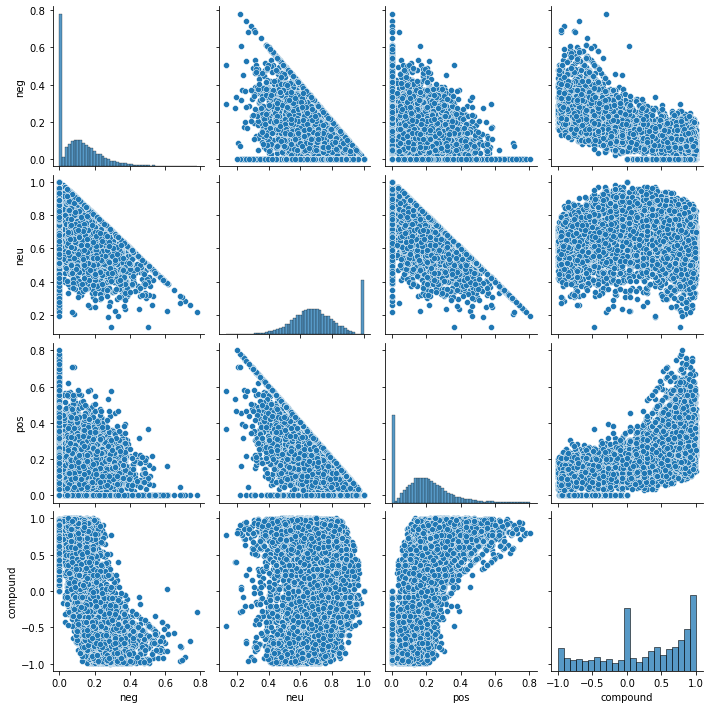

In [31]:
sns.pairplot(sent_df);